In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
!pip install huggingface_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 18.6 MB/s eta 0:00:00


In [ ]:
from huggingface_hub import notebook_login
notebook_login()

Token is valid.
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
import pandas as pd
df=pd.read_csv("twitter_parsed_dataset.csv").drop(columns=["id","index","Annotation"])
df.head()

,Text,oh_label
0,@halalflaws @biebervalue @greenlinerzjm I read...,0.0
1,@ShreyaBafna3 Now you idiots claim that people...,0.0
2,"RT @Mooseoftorment Call me sexist, but when I ...",1.0
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",1.0
4,#mkr No No No No No No,0.0


In [ ]:
df.columns=["text","label"]
df.head()

,text,label
0,@halalflaws @biebervalue @greenlinerzjm I read...,0.0
1,@ShreyaBafna3 Now you idiots claim that people...,0.0
2,"RT @Mooseoftorment Call me sexist, but when I ...",1.0
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",1.0
4,#mkr No No No No No No,0.0


In [ ]:
import numpy as np
df.dropna(inplace=True)
df.replace([np.inf, -np.inf], 0, inplace=True)
df['label'] = df['label'].astype(int)


In [ ]:
df.head()

,text,label
0,@halalflaws @biebervalue @greenlinerzjm I read...,0
1,@ShreyaBafna3 Now you idiots claim that people...,0
2,"RT @Mooseoftorment Call me sexist, but when I ...",1
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",1
4,#mkr No No No No No No,0


In [ ]:
df.shape

(16848, 2)

In [ ]:
import matplotlib.pyplot as plt


([<matplotlib.axis.XTick at 0x7f21fb815c10>,
 [Text(0, 0, 'positive'), Text(0, 0, 'negative')])

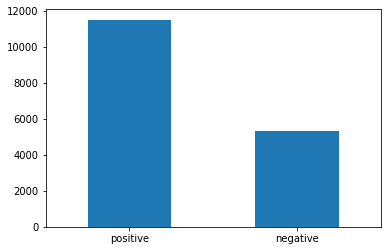

In [ ]:
df["label"].value_counts().plot(kind='bar')
plt.xticks([0,1,],['positive','negative'],rotation=0)

In [ ]:
df['label'].value_counts()

0    11501
1     5347
Name: label, dtype: int64

In [ ]:
df.head()

,text,label
0,@halalflaws @biebervalue @greenlinerzjm I read...,0
1,@ShreyaBafna3 Now you idiots claim that people...,0
2,"RT @Mooseoftorment Call me sexist, but when I ...",1
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",1
4,#mkr No No No No No No,0


In [ ]:
import re
import string

In [ ]:
def clean_text(text):
    
    sample = text
    sample = " ".join([x.lower() for x in sample.split()])
    sample = re.sub(r"\S*https?:\S*", '', sample) #links and urls
    sample = re.sub('\[.*?\]', '', sample) #text between [square brackets]
    sample = re.sub('\(.*?\)', '', sample) #text between (parenthesis)
    sample = re.sub('#', ' ', sample) #remove hashtags
    sample = ' '.join([x for x in sample.split() if not x.startswith('@')]) # remove mentions with @
    #sample = " ".join([contractions.fix(x) for x in sample.split()])  # fixes contractions like you're to you are
    sample = re.sub('[%s]' % re.escape(string.punctuation), ' ', sample) #punctuations
    sample = re.sub('\w*\d\w', '', sample) #digits with trailing or preceeding text
    sample = re.sub(r'\n', ' ', sample) #new line character
    sample = re.sub(r'\\n', ' ', sample) #new line character
    sample = re.sub("[''""...“”‘’…]", '', sample) #list of quotation marks
    sample = " ".join(x.strip() for x in sample.split()) #strips whitespace
    sample = re.sub(r', /<[^>]+>/', '', sample)    #HTML attributes
    
    sample = ' '.join(list(filter(lambda ele: re.search("[a-zA-Z\s]+", ele) is not None, sample.split()))) #languages other than english
    
    sample = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE).sub(r'', sample) #emojis and symbols
    sample = sample.strip()
    sample = " ".join([x.strip() for x in sample.split()])
    
    return sample

In [ ]:
df["text"]=df["text"].apply(lambda x:clean_text(str(x)))

In [ ]:

df.head(70)

,text,label
0,i read them in context no change in meaning th...,0
1,now you idiots claim that people who tried to ...,0
2,rt call me sexist but when i go to an auto pla...,1
3,wrong isis follows the example of mohammed and...,1
4,mkr no no no no no no,0
...,...,...
65,both daesh and shia militia are driven by a re...,1
66,booo kat and andre did not deserve to get thro...,0
67,just my guess it s now in my tweets as proof i...,1
68,ok who should stay and who should go mkr,0


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 63.5 MB/s eta 0:00:00


In [ ]:
X=list(df['text'])
y=list(df['label'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 0)


In [ ]:

from transformers import AutoTokenizer

model_checkpoint = "distilbert-base-cased-distilled-squad"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

In [ ]:
train_encodings = tokenizer(X_train,
                            truncation=True,
                            padding=True)
test_encodings = tokenizer(X_test,
                            truncation=True,
                            padding=True)

In [ ]:
import tensorflow as tf

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train
))

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    y_test
))

In [ ]:
id2label = {0: "no cyber bullying", 1: "cyber bullying(racism or sexism)"}
label2id = {"no cyber bullying": 0, "cyber bullying(racism or sexism)": 1}

In [ ]:
from transformers import TFAutoModelForSequenceClassification

model = TFAutoModelForSequenceClassification.from_pretrained(model_checkpoint)

Some layers from the model checkpoint at distilbert-base-cased-distilled-squad were not used when initializing TFDistilBertForSequenceClassification: ['qa_outputs']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased-distilled-squad and are newly initialized: ['pre_classifier', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import AdamWeightDecay

optimizer = AdamWeightDecay(5e-5, weight_decay_rate=0.01)
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss,metrics=['accuracy'])

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(class_weight = "balanced", classes= np.unique(y_train), y= y_train)
class_weights
# Transform array to dictionary
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.7322998164783154, 1: 1.5761954261954263}

In [ ]:
from transformers import PushToHubCallback

callbacks = [PushToHubCallback("model_output/", 
                               tokenizer=tokenizer,
                               hub_model_id="Amitesh007/tw-sentiment-finetuned")]


Cloning https://huggingface.co/Amitesh007/tw-sentiment-finetuned into local empty directory.


In [ ]:
history=model.fit(train_dataset.shuffle(1000).batch(32),
          epochs=3,
          batch_size=32,
          validation_data=test_dataset.shuffle(1000).batch(32),callbacks=callbacks,class_weight=class_weights)

Epoch 1/3
474/474 [==============================] - 114s 212ms/step - loss: 0.4620 - accuracy: 0.7977 - val_loss: 0.3893 - val_accuracy: 0.8332
Epoch 2/3
474/474 [==============================] - 109s 230ms/step - loss: 0.3238 - accuracy: 0.8596 - val_loss: 0.4674 - val_accuracy: 0.8362
Epoch 3/3
474/474 [==============================] - 110s 232ms/step - loss: 0.2039 - accuracy: 0.9171 - val_loss: 0.4805 - val_accuracy: 0.8237


In [ ]:
model.push_to_hub("Amitesh007/tw-sentiment-finetuned", commit_message="End of training")

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

tf_model.h5:   0%|          | 0.00/263M [00:00<?, ?B/s]

In [ ]:

label_names=['no cyber bullying','cyber bullying']

In [ ]:
model.config.id2label = {str(i): lbl for i, lbl in enumerate(label_names)}
model.config.label2id = {lbl: str(i) for i, lbl in enumerate(label_names)}

In [ ]:
repo_name = "Amitesh007/tw-sentiment-finetuned"
model.config.push_to_hub(repo_name)

CommitInfo(commit_url='https://huggingface.co/Amitesh007/tw-sentiment-finetuned/commit/241b416765e3d99f188732dcfd825d8a2a1792c2', commit_message='Upload config', commit_description='', oid='241b416765e3d99f188732dcfd825d8a2a1792c2', pr_url=None, pr_revision=None, pr_num=None)